## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
!pip install imblearn

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Missing value imputation
from sklearn.impute import SimpleImputer

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_recall_curve,roc_curve,make_scorer
from sklearn.model_selection import GridSearchCV

#Ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Crossvalidation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/ReneWind/Train.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [ ]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0
19999,-2.686903,1.961187,6.137088,2.600133,2.657241,-4.290882,-2.344267,0.974004,-1.027462,0.497421,...,6.620811,-1.988786,-1.348901,3.951801,5.449706,-0.455411,-2.202056,1.678229,-1.974413,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [ ]:
df.shape

(20000, 41)

In [ ]:
df['Target'].value_counts()

0    18890
1     1110
Name: Target, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


**Observations:**
- Dataset has 20000 rows and 40 columns
- All the columns are of numeric data type
- V1 and V2 has missing values and needs traetment. Other columns are good.
- Dataset is not balaced
- Dataset has 18890 non fault targets and 1110 faulty targets


## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [1]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

In [2]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

NameError: name 'df' is not defined

In [ ]:
#Bivariate analysis
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#Bivariate analysis
X = df.drop('Target',axis=1)
Y = df['Target']

In [ ]:
#target vs independant variables
for col in X:
  plt.figure()
  sns.barplot(x=Y, y= X[col])

**Observations:**

- Most of the columns are normally distributed, except few.
- Most of the independant variables have significant impact on target.

## Data Pre-processing

In [ ]:
#Find missing values
for cols in X:
  #print(cols)
  print("Null values in", cols,"is ",  end='')
  print(X[cols].isnull().sum())

Null values in V1 is 18
Null values in V2 is 18
Null values in V3 is 0
Null values in V4 is 0
Null values in V5 is 0
Null values in V6 is 0
Null values in V7 is 0
Null values in V8 is 0
Null values in V9 is 0
Null values in V10 is 0
Null values in V11 is 0
Null values in V12 is 0
Null values in V13 is 0
Null values in V14 is 0
Null values in V15 is 0
Null values in V16 is 0
Null values in V17 is 0
Null values in V18 is 0
Null values in V19 is 0
Null values in V20 is 0
Null values in V21 is 0
Null values in V22 is 0
Null values in V23 is 0
Null values in V24 is 0
Null values in V25 is 0
Null values in V26 is 0
Null values in V27 is 0
Null values in V28 is 0
Null values in V29 is 0
Null values in V30 is 0
Null values in V31 is 0
Null values in V32 is 0
Null values in V33 is 0
Null values in V34 is 0
Null values in V35 is 0
Null values in V36 is 0
Null values in V37 is 0
Null values in V38 is 0
Null values in V39 is 0
Null values in V40 is 0


In [ ]:
#Split Training set to Train and validation set

X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.25,random_state=1,stratify=Y)
print(X_train.shape, X_val.shape,Y_train.shape,Y_val.shape)

(15000, 40) (5000, 40) (15000,) (5000,)


## Missing value imputation




In [3]:
#Impute Median for null values
imputer = SimpleImputer( strategy="median")

NameError: name 'SimpleImputer' is not defined

In [4]:
#Apply imputer to train and Validation sets

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.fit_transform(X_val), columns=X_val.columns)

NameError: name 'pd' is not defined

In [ ]:
#Find missing values
for cols in X_train:
  #print(cols)
  print("Null values in", cols,"is ",  end='')
  print(X_train[cols].isnull().sum())

In [ ]:
#Find missing values
for cols in X_val:
  #print(cols)
  print("Null values in", cols,"is ",  end='')
  print(X_val[cols].isnull().sum())

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LogisticRegression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=Y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, Y_train)
    scores = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

LogisticRegression: 0.4927566553639709
dtree: 0.6982829521679532
Bagging: 0.7210807301060529
Random forest: 0.7235192266070268
GBM: 0.7066661857008874
Adaboost: 0.6309140754635308
Xgboost: 0.8100497799581561

Validation Performance:

LogisticRegression: 0.48201438848920863
dtree: 0.7050359712230215
Bagging: 0.7302158273381295
Random forest: 0.7266187050359713
GBM: 0.7230215827338129
Adaboost: 0.6762589928057554
Xgboost: 0.8309352517985612


### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_oversampled, Y_train_oversampled = sm.fit_resample(X_train, Y_train)

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(Y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(Y_train == 0)))

print("After Oversampling, counts of label 'Yes': {}".format(sum(Y_train_oversampled == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(Y_train_oversampled == 0)))

Before Oversampling, counts of label 'Yes': 832
Before Oversampling, counts of label 'No': 14168 

After Oversampling, counts of label 'Yes': 14168
After Oversampling, counts of label 'No': 14168 



In [ ]:
models_o = []  # Empty list to store all the models

# Appending models into the list
models_o.append(("LogisticRegression", LogisticRegression(random_state=1)))
models_o.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_o.append(("Bagging", BaggingClassifier(random_state=1)))
models_o.append(("Random forest", RandomForestClassifier(random_state=1)))
models_o.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_o.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_o.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results2 = []  # Empty list to store all model's CV scores
names2 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models_o:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result2 = cross_val_score(
        estimator=model, X=X_train_oversampled, y=Y_train_oversampled, scoring=scorer, cv=kfold
    )
    results2.append(cv_result2)
    names2.append(name)
    print("{}: {}".format(name, cv_result2.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_oversampled, Y_train_oversampled)
    scores1 = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores1))


Cross-Validation performance on training dataset:

LogisticRegression: 0.883963699328486
dtree: 0.9720494245534969
Bagging: 0.9762141471581656
Random forest: 0.9839075260047615
GBM: 0.9256068151319724
Adaboost: 0.8978689011775473
Xgboost: 0.9891305241357218

Validation Performance:

LogisticRegression: 0.8489208633093526
dtree: 0.7769784172661871
Bagging: 0.8345323741007195
Random forest: 0.8489208633093526
GBM: 0.8776978417266187
Adaboost: 0.8561151079136691
Xgboost: 0.8669064748201439


### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, Y_train_un = rus.fit_resample(X_train, Y_train)

In [ ]:
print("Before undersampling, counts of label 'Yes': {}".format(sum(Y_train == 1)))
print("Before undersampling, counts of label 'No': {} \n".format(sum(Y_train == 0)))

print("After undersampling, counts of label 'Yes': {}".format(sum(Y_train_un == 1)))
print("After undersampling, counts of label 'No': {} \n".format(sum(Y_train_un == 0)))

Before undersampling, counts of label 'Yes': 832
Before undersampling, counts of label 'No': 14168 

After undersampling, counts of label 'Yes': 832
After undersampling, counts of label 'No': 832 



In [ ]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("LogisticRegression", LogisticRegression(random_state=1)))
models_un.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_un.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_un.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results3 = []  # Empty list to store all model's CV scores
names3 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models_o:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result3 = cross_val_score(
        estimator=model, X=X_train_un, y=Y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result3)
    names3.append(name)
    print("{}: {}".format(name, cv_result3.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, Y_train_un)
    scores3 = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores3))


Cross-Validation performance on training dataset:

LogisticRegression: 0.8726138085275232
dtree: 0.8617776495202367
Bagging: 0.8641945025611427
Random forest: 0.9038669648654498
GBM: 0.8990621167303946
Adaboost: 0.8666113556020489
Xgboost: 0.9014717552846114

Validation Performance:

LogisticRegression: 0.8525179856115108
dtree: 0.841726618705036
Bagging: 0.8705035971223022
Random forest: 0.8920863309352518
GBM: 0.8884892086330936
Adaboost: 0.8489208633093526
Xgboost: 0.89568345323741


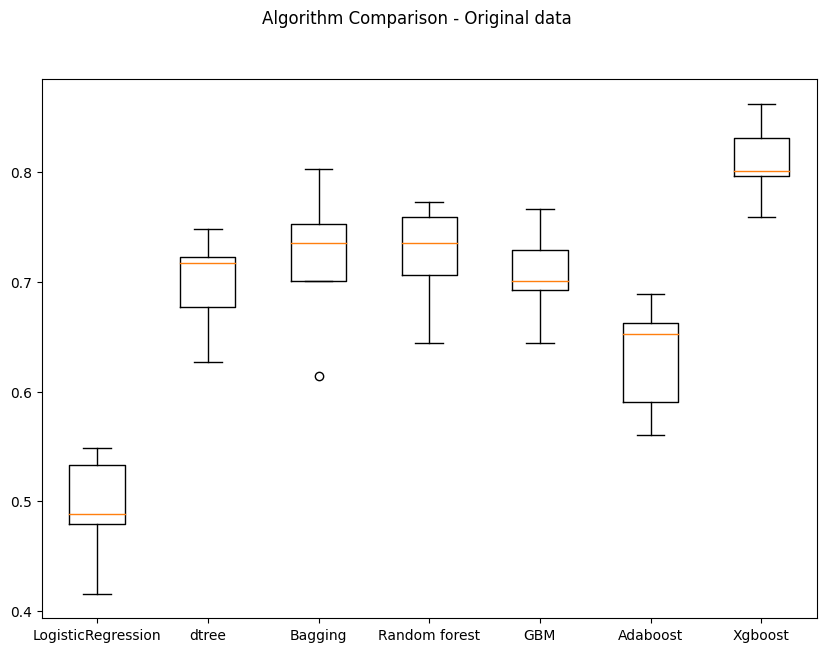

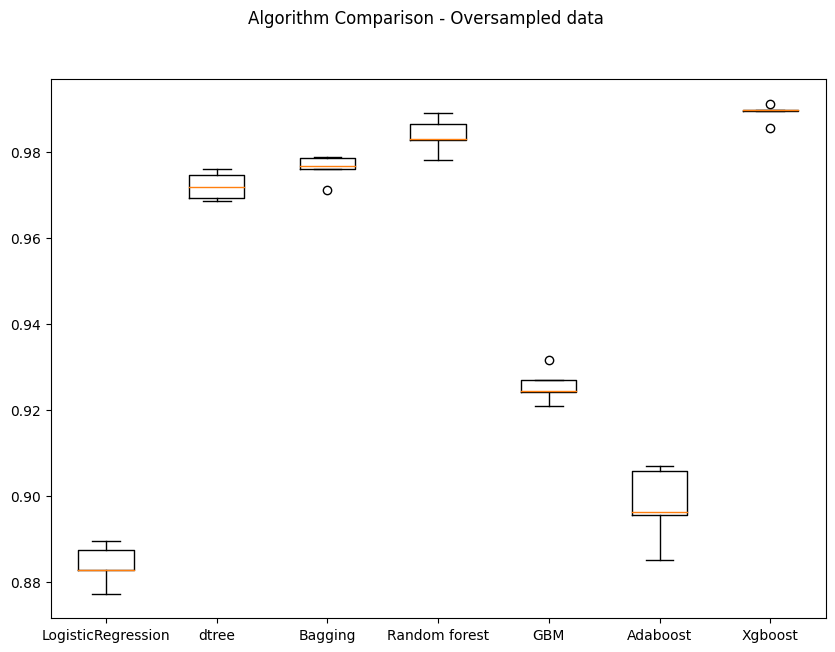

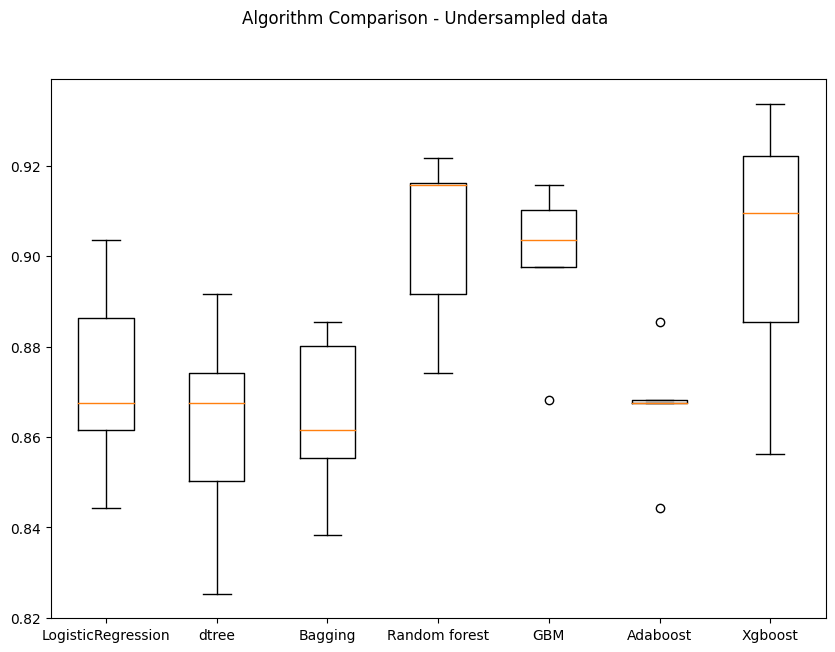

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison - Original data")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)
plt.show()

# Oversample
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison - Oversampled data")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)
plt.show()

# Undersample
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison - Undersampled data")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)
plt.show()

**Selecting top 3 models for Hyperparameter tuning:**

* Xgboost tops in all three samples, followed by Random forest and Bagging
* Gradient boosting comes in top3 only in undersampled data, so let's not consider that
* Lets choose XGboost, Random forest and Bagging for tuning


## HyperparameterTuning

In [ ]:
#XGBoost

model_temp = XGBClassifier(random_state=1)
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

ht_random = RandomizedSearchCV(estimator=model_temp,param_distributions=param_grid,n_iter=10,scoring=scorer,n_jobs=-1,cv=5,random_state=1)

#Execute in Training set
ht_random.fit(X_train,Y_train)

print("Best parameters are {} with CV score={}:" .format(ht_random.best_params_,ht_random.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.8546353076978572:


In [ ]:
#Use the best parameters for model building
xgb_tuned = XGBClassifier(subsample=0.8, n_estimators=200,scale_pos_weight=10,learning_rate=0.1,gamma=5)
xgb_tuned.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Metrics - training data

xgb_tuned_perf_train = model_performance_classification_sklearn(xgb_tuned,X_train,Y_train)
print("Metrics - training data")
xgb_tuned_perf_train

Metrics - training data


,Accuracy,Recall,Precision,F1
0,0.998733,1.0,0.977673,0.988711


In [ ]:
#Metrics - Validation data

xgb_tuned_perf_val = model_performance_classification_sklearn(xgb_tuned,X_val,Y_val)

print("Metrics - validation data")
xgb_tuned_perf_val

Metrics - validation data


,Accuracy,Recall,Precision,F1
0,0.9892,0.859712,0.940945,0.898496


In [ ]:
#Random forest
model_temp_rf = RandomForestClassifier(random_state=1)
param_grid = { "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], "max_samples": np.arange(0.4, 0.7, 0.1) }

ht_random_rf = RandomizedSearchCV(estimator=model_temp_rf,param_distributions=param_grid,n_iter=10,scoring=scorer,n_jobs=-1,cv=5,random_state=1)

ht_random_rf.fit(X_train,Y_train)
print("Best parameters are {} with CV score={}:" .format(ht_random_rf.best_params_,ht_random_rf.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6996248466921577:


In [ ]:
#Model building with best parameters
rf_tuned = RandomForestClassifier(n_estimators=250,min_samples_leaf=1,max_samples=0.6,max_features='sqrt')
rf_tuned.fit(X_train,Y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=250)

In [ ]:
#Metrics - training data - Random forest

rf_tuned_perf_train = model_performance_classification_sklearn(rf_tuned,X_train,Y_train)
print("Metrics - training data")
rf_tuned_perf_train

Metrics - training data


,Accuracy,Recall,Precision,F1
0,0.994933,0.908654,1.0,0.952141


In [ ]:
#Metrics - validation data - Random forest

rf_tuned_perf_val = model_performance_classification_sklearn(rf_tuned,X_val,Y_val)
print("Metrics - training data")
rf_tuned_perf_val

Metrics - training data


,Accuracy,Recall,Precision,F1
0,0.9836,0.715827,0.985149,0.829167


In [ ]:
#Bagging

model_temp_bagging = BaggingClassifier(random_state=1)
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }

ht_random_bagging = RandomizedSearchCV(estimator=model_temp_bagging, param_distributions=param_grid, n_iter=10, scoring=scorer,n_jobs=-1,cv=5,random_state=1)
ht_random_bagging.fit(X_train,Y_train)

print("Best parameters are {} with CV score={}:" .format(ht_random_bagging.best_params_,ht_random_bagging.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.9} with CV score=0.7308563595700166:


In [ ]:
#Model building with best parameters
bagging_tuned = BaggingClassifier(n_estimators=70,max_samples=0.8, max_features=0.9)
bagging_tuned.fit(X_train,Y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=70)

In [ ]:
#Metrics - Training data - Bagging
bagging_tuned_perf_train = model_performance_classification_sklearn(bagging_tuned,X_train,Y_train)
print("Metrics - training data")
bagging_tuned_perf_train

Metrics - training data


,Accuracy,Recall,Precision,F1
0,0.998467,0.972356,1.0,0.985984


In [ ]:
#Metrics - Validation data - Bagging
bagging_tuned_perf_val = model_performance_classification_sklearn(bagging_tuned,X_val,Y_val)
print("Metrics - Validation data")
bagging_tuned_perf_val

Metrics - Validation data


,Accuracy,Recall,Precision,F1
0,0.9832,0.733813,0.953271,0.829268


### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Decision tree with original data

In [ ]:
'''
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))
'''

'\n# defining model\nModel = DecisionTreeClassifier(random_state=1)\n\n# Parameter grid to pass in RandomSearchCV\nparam_grid = {\'max_depth\': np.arange(2,6),\n              \'min_samples_leaf\': [1, 4, 7], \n              \'max_leaf_nodes\' : [10,15],\n              \'min_impurity_decrease\': [0.0001,0.001] }\n\n#Calling RandomizedSearchCV\nrandomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)\n\n#Fitting parameters in RandomizedSearchCV\nrandomized_cv.fit(X_train,y_train)\n\nprint("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))\n'

### Sample tuning method for Decision tree with oversampled data

In [ ]:
'''
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))
'''

### Sample tuning method for Decision tree with undersampled data

In [ ]:
'''
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))
'''

## Model performance comparison and choosing the final model

In [ ]:
#Training - Model comparison

model_comp_train_df = pd.concat([xgb_tuned_perf_train.T, rf_tuned_perf_train.T, bagging_tuned_perf_train.T],axis=1)
model_comp_train_df.columns = ["XG Boost Tuned", "Random Forest Tuned", "Bagging Classifier Tuned"]

print("Training performance comparison")
model_comp_train_df

Training performance comparison


,XG Boost Tuned,Random Forest Tuned,Bagging Classifier Tuned
Accuracy,0.998733,0.994933,0.998467
Recall,1.000000,0.908654,0.972356
Precision,0.977673,1.000000,1.000000
F1,0.988711,0.952141,0.985984


In [ ]:
#Validation set - Model comparison

model_comp_val_df = pd.concat([xgb_tuned_perf_val.T,rf_tuned_perf_val.T,bagging_tuned_perf_val.T],axis=1)
model_comp_val_df.columns = ["XG Boost Tuned", "Random Forest Tuned", "Bagging Classifier Tuned"]

print("Validation performance comparison")
model_comp_val_df

Validation performance comparison


,XG Boost Tuned,Random Forest Tuned,Bagging Classifier Tuned
Accuracy,0.989200,0.983600,0.983200
Recall,0.859712,0.715827,0.733813
Precision,0.940945,0.985149,0.953271
F1,0.898496,0.829167,0.829268


**Model selection:**

* XG Boost after tuning has highest Recall score in validation set
* Let's finalize the same as the final model

### Test set final performance

In [ ]:
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/ReneWind/Test.csv')
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [ ]:
test_df.shape

(5000, 41)

In [ ]:
X_test = test_df.drop('Target',axis=1)
Y_test = test_df['Target']

In [ ]:
X_test.shape

(5000, 40)

In [ ]:
Y_test.shape

(5000,)

In [ ]:
#Model execution in Test set
xgb_perf_test = model_performance_classification_sklearn(xgb_tuned, X_test,Y_test)

print("Metrics - Test data")
xgb_perf_test

Metrics - Test data


,Accuracy,Recall,Precision,F1
0,0.9882,0.847518,0.937255,0.89013


* Execution in Test set gives generalised results. so the model is a good fit.

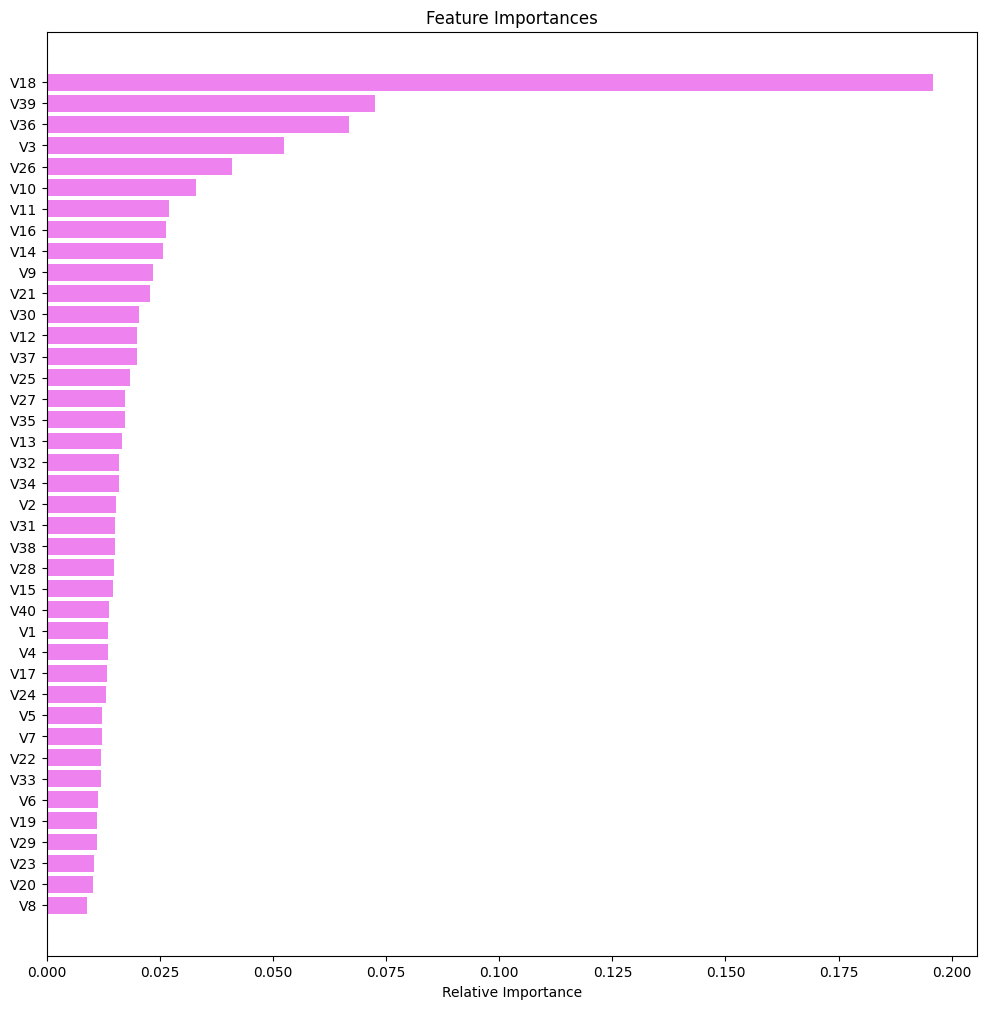

In [ ]:
#Feature importance

feature_names = X_test.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Pipelines to build the final model


In [ ]:
pipe_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/ReneWind/Train.csv')
pipe_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [ ]:
#Data pipeline
columns = pipe_df.columns
columns_1 = columns.drop("Target")
missingvalue_transformer = Pipeline( steps=[("imputer", SimpleImputer(strategy="median"))])
data_pipeline = ColumnTransformer( transformers=[("mv_tr",missingvalue_transformer,columns_1),],remainder="passthrough")


In [ ]:
columns = pipe_df.columns
columns_1 = columns.drop("Target")
print(columns_1)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40'],
      dtype='object')


In [ ]:
print(type(data_pipeline))

<class 'sklearn.compose._column_transformer.ColumnTransformer'>


In [ ]:
X_train_pipe = pipe_df.drop( columns= "Target")
Y_train_pipe = pipe_df["Target"]

In [ ]:
print(X_train_pipe.shape,Y_train_pipe.shape)

(20000, 40) (20000,)


In [ ]:
#ML pipeline
model = Pipeline( steps=[("data_pl",data_pipeline),("XGB",XGBClassifier(subsample=0.8, n_estimators=200,scale_pos_weight=10,learning_rate=0.1,gamma=5))])
model.fit(X_train_pipe,Y_train_pipe)

Pipeline(steps=[('data_pl',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mv_tr',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33'...
                               feature_types=None, gamma=5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
#Execute in Test set

model_test = model_performance_classification_sklearn(model,X_test,Y_test)
model_test

,Accuracy,Recall,Precision,F1
0,0.9868,0.843972,0.915385,0.878229


# Business Insights and Conclusions

***

**Model conclusion:**

* This Model is able to predict the target with 99% accuracy, generalized.
* No data leakage
* Model is built with 84% Recall, 99% Accuracy, 91% Precision and 87% F1 score

**Business insights:**

> Renewind may focus on the factor - V8, as it's highly prone to fail

> Followed by V20,V23,V29,V19,V6,V33

> Frequent inspections would help in avoiding high replacement costs after failure

> It will also avoid repair costs

> Periodical inspections in the following factors will also be helpful in reducing repair and replacement costs - V22,V7,V5,V24,V17,V4,V1,V40

> Factors following are highly stable and less prone to failure - V18,V39,V36,V3,V26,V10,V11,V16,V14